# NoteBook pour scraper les données des airbnb d'une ville


### Que fait ce notebook
 
Ce notebook permet de récupérer des données sur les différents airbnb disponibles dans une ville.   
Pour le moment, les données récupérées sont le prix de la nuit, le nombre de voyageur pouvant être accueillis, le nombre de chambre, le type de logement, si l'utilisateur est un superhost, le nombre de commentaires, la notes donnée par les utilisateur et le lien vers l'annonce.   

### Comment l'utiliser 

**Scraper les données d'une nouvelle ville**   
Aller faire la recherche airbnb dans la ville voulu et zoomer/dézoomer sur la zone qui nous intéresse   
Aller à la cellule qui s'intitule "Scrape Prices and Links through all pages"   
Remplacer l'url présent dans la variable url par l'url qui vient d'être copié   
Lancer cette cellule   
La liste des liens et des prix de toutes les annnonces est faite   

Aller à la cell appelé "Scraping cell below"   
La lancer, elle indiquera le temps estimé et la page en cours de traitement   
Elle précise aussi les pages pour lesquelle le scraping n'a pas fonctionné    
Un Dataframe appelé data est alors créé avec toutes les données   

**Enregistrer en charger un dataset**     
La cell appelé "Save DataFrame" permet d'enregistrer le dataframe dans un fichier csv   
Pour charger un dataset et travailler dessus, lancer la cell s'appelant "Plot First Results"   

## Brouillon Airbnb Scrape

In [ ]:
from bs4 import BeautifulSoup as Bs
import requests
url = "https://www.airbnb.fr/s/Les-Sables~d'Olonne/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2023-08-01&monthly_length=3&price_filter_input_type=0&price_filter_num_nights=7&channel=EXPLORE&query=Les%20Sables-d%27Olonne%2C%20France&place_id=ChIJH7h514pnBEgRQLIJHlI3DQQ&date_picker_type=calendar&checkin=2024-07-13&checkout=2024-07-20&source=structured_search_input_header&search_type=user_map_move&ne_lat=46.51658561633989&ne_lng=-1.7433447135422284&sw_lat=46.47244695433189&sw_lng=-1.8029970420334394&zoom=14&zoom_level=14&search_by_map=true"
req = requests.get(url)
soup = Bs(req.text, "html.parser")

In [ ]:
div = soup.find("div", {"class": "gsgwcjk g8ge8f1 g14v8520 dir dir-ltr"})
divs = div.find_all("div", {"class": "c4mnd7m dir dir-ltr"})
divs[1]

In [ ]:
div_prices = div.find_all("div", {"class": "_1jo4hgw"})
div_prices

In [ ]:
str_prices = []
for div_price in div_prices:
    span = div_price.find("span")
    str_prices.append(span.text)
str_prices

In [ ]:
import re

In [ ]:
for i in range(len(str_prices)):
    str_prices[i] = re.findall('^\D*(\d+)', str_prices[i])
str_prices

In [ ]:
base_url = "https://www.airbnb.fr/"
url_next_link = soup.find('a', {'aria-label': 'Suivant'})
final_link_url = base_url + url_next_link['href']
final_link_url

In [ ]:
req = requests.get(final_link_url)
soup2 = Bs(req.text, "html.parser")
div_prices2 = soup2.find_all("div", {"class": "_1jo4hgw"})
str_prices2 = []
for div_price in div_prices2:
    span = div_price.find("span")
    str_prices2.append(span.text)
for i in range(len(str_prices2)):
    str_prices2[i] = re.findall('^\D*(\d+)', str_prices2[i])
str_prices2

In [ ]:
last_url = "https://www.airbnb.fr/s/Les-Sables~d'Olonne/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2023-08-01&monthly_length=3&price_filter_input_type=0&price_filter_num_nights=7&channel=EXPLORE&query=Les%20Sables-d%27Olonne%2C%20France&place_id=ChIJH7h514pnBEgRQLIJHlI3DQQ&date_picker_type=calendar&checkin=2024-07-13&checkout=2024-07-20&source=structured_search_input_header&search_type=user_map_move&ne_lat=46.51895676816752&ne_lng=-1.7563909779193523&sw_lat=46.47482003149976&sw_lng=-1.8160433064105632&zoom=14&zoom_level=14&search_by_map=true&federated_search_session_id=fed91c31-468c-4ac4-994c-2e08d8c1cd42&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MywiaXRlbXNfb2Zmc2V0IjoyNTIsInZlcnNpb24iOjF9"
req = requests.get(last_url)
soup = Bs(req.text, 'html.parser')
url_next_link = soup.find('a', {'aria-label': 'Suivant'})
if not url_next_link:
    print("Fin")

## Scrape Airbnb ( Prices and Links for one page + LinkToNextPage)

In [ ]:
from bs4 import BeautifulSoup as Bs
import requests
import re
url = "https://www.airbnb.fr/s/Les-Sables~d'Olonne/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2023-08-01&monthly_length=3&price_filter_input_type=0&price_filter_num_nights=7&channel=EXPLORE&query=Les%20Sables-d%27Olonne%2C%20France&place_id=ChIJH7h514pnBEgRQLIJHlI3DQQ&date_picker_type=calendar&checkin=2024-07-13&checkout=2024-07-20&source=structured_search_input_header&search_type=user_map_move&ne_lat=46.51895676816752&ne_lng=-1.7563909779193523&sw_lat=46.47482003149976&sw_lng=-1.8160433064105632&zoom=14&zoom_level=14&search_by_map=true&federated_search_session_id=fed91c31-468c-4ac4-994c-2e08d8c1cd42&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MCwiaXRlbXNfb2Zmc2V0IjowLCJ2ZXJzaW9uIjoxfQ%3D%3D"
req = requests.get(url)
soup = Bs(req.text, "html.parser")

In [ ]:
#Get prices
str_prices = []
div_prices = soup.find_all("div", {"class": "_1jo4hgw"})
for div_price in div_prices:
    span = div_price.find("span") 
    text = re.findall('^\D*(\d+)', span.text) #Regex to keep the first digit of the span.text (the price)
    str_prices.append(text)
str_prices

In [ ]:
#Get links
base_url = "https://www.airbnb.fr/"
str_links = []
div_core = soup.find("div", {"class": "gsgwcjk g8ge8f1 g14v8520 dir dir-ltr"})
div_links = div_core.find_all("div", {"class": "c14whb16 dir dir-ltr"})
for div_link in div_links:
    a_link = div_link.find("a", {"class": "rfexzly dir dir-ltr"})
    link = a_link["href"] 
    str_links.append(base_url + link)
    
str_links

In [ ]:
url_next_link = soup.find('a', {'aria-label': 'Suivant'})
final_link_url = base_url + url_next_link['href']
final_link_url

## Scrape Prices and Links through all pages

In [2]:
from bs4 import BeautifulSoup as Bs
from selenium import webdriver
import requests
import time
import re

#First URL
url = "https://www.airbnb.fr/s/Les-Sables~d'Olonne/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2023-08-01&monthly_length=3&price_filter_input_type=0&price_filter_num_nights=7&channel=EXPLORE&query=Les%20Sables-d%27Olonne%2C%20France&place_id=ChIJH7h514pnBEgRQLIJHlI3DQQ&date_picker_type=calendar&checkin=2024-07-13&checkout=2024-07-20&source=structured_search_input_header&search_type=user_map_move&ne_lat=46.52128134098599&ne_lng=-1.7393829759291464&sw_lat=46.47714649191051&sw_lng=-1.7990353044203573&zoom=14&zoom_level=14&search_by_map=true"
base_url = "https://www.airbnb.fr/"
str_prices = []
str_links = []
page_count = 1
webdriver = webdriver.Chrome()

while url:
    webdriver.get(url)
    time.sleep(2)

    webdriver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    soup = Bs(webdriver.page_source,'html.parser')
    
    #req = requests.get(url)
    #soup = Bs(req.text, "html.parser")
    
    #Scrape Prices
    div_prices = soup.find_all("div", {"class": "_1jo4hgw"})
    for div_price in div_prices:
        span = div_price.find("span") 
        text = re.findall('^\D*(\d+)', span.text) #Regex to keep the first digit of the span.text (the price)
        str_prices.append(text)
    #Scrape Links
    div_core = soup.find("div", {"class": "gsgwcjk g8ge8f1 g14v8520 dir dir-ltr"})
    div_links = div_core.find_all("div", {"class": "c14whb16 dir dir-ltr"})
    for div_link in div_links:
        a_link = div_link.find("a", {"class": "rfexzly dir dir-ltr"})
        link = a_link["href"] 
        str_links.append(base_url + link)
    #Scrape next page link
    url_next_link = soup.find('a', {'aria-label': 'Suivant'})
    url = None if not url_next_link else base_url + url_next_link['href']
    print(page_count)
    page_count = page_count+1

len(str_prices)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


257

## Scrape one airbnb advert

In [ ]:
url1 = str_links[0]
req1 = requests.get(url1)
soup1 = Bs(req1.text, "html.parser")
url1

In [ ]:
div_night_price = soup1.find_all("div", {"class": "_16e70jgn"})
if not div_night_price: 
    print('Not Found')
else:
    print(div_night_price)

#### Cells above don't get the full html page bc it is loaded dynamically. 
#### Below, we use selenium to fully open the page and get he full html page

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup as Bs 
import time

url = "https://www.airbnb.fr/rooms/45617384?check_in=2024-07-13&check_out=2024-07-20&source_impression_id=p3_1689578912_PTzRv%2F2ot82NSFjQ&previous_page_section_name=1000&federated_search_id=ab7230c6-a507-4cc8-999d-3bf1ecb75441"
webdriver = webdriver.Chrome()
webdriver.get(url)
time.sleep(2)

webdriver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)
soup = Bs(webdriver.page_source,'html.parser')

In [ ]:
import re

In [ ]:
span_night_price = soup.find("span", {"class": "_tyxjp1"})
price = int(re.findall('^\D*(\d+)', span_night_price.text)[0])
print(price)

In [ ]:
#Scrape nb_traveller, category, nb_bed, nb_bathroom
ol = soup.find("ol", {"class": "lgx66tx dir dir-ltr"})
li = ol.find_all("li")

#nb_traveller
str_nb_traveller = li[0].find("span", class_=None).text
nb_traveller = int(re.findall('^\D*(\d+)', str_nb_traveller)[0])
print(nb_traveller)

#category
category = li[1].find("span", class_=None).text
print(category)

#nb_bed
str_nb_bed = li[2].find("span", class_=None).text
nb_bed = int(re.findall('^\D*(\d+)', str_nb_bed)[0])
print(nb_bed)

#nb_bathroom
str_nb_bathroom = li[3].find("span", class_=None).text
nb_bathroom = int(re.findall('^\D*(\d+)', str_nb_bathroom)[0])
print(nb_bathroom)

In [ ]:
superhost = soup.find("span", {"class": "_1mhorg9"})
if superhost:
    superhost = True
else:
    superhost = False
print(superhost)

In [ ]:
#Scrape rating and nb_comment (this div avoids searching through the whole page twice)
rating_span = soup.find("span", {"class": "_1y9gwt75"})

In [ ]:
rating = rating_span.find("span", {"class": "_12si43g"})
if rating:
    rating = rating.text
    rating = re.sub(' ·', '', rating)
    rating = float(re.sub(',', '.', rating))
else: 
    rating = None
print(rating)

In [ ]:
nb_comment = rating_span.find("span", {"class": "_bq6krt"})
if nb_comment:
    nb_comment = int(re.findall('^\D*(\d+)', nb_comment.text)[0])
else: 
    nb_comment = None
print(nb_comment)

## Scrape adverts with loop

In [ ]:
import pandas as pd

In [ ]:
# Create pd DataFrame 
names = ['AZER', 'QSDF']
prices = [45, 57]

df = pd.DataFrame(zip(names, prices), columns=['names', 'prices'])
print(df)

#Add new data at the end through a list
other = ['WXCV', 87]
df.loc[len(df)] = other
df

In [ ]:
str_links_test = str_links[:24]
data = pd.DataFrame(columns=['Night Price', 'Nb Travellers', 'Housing Type', 'Nb Beds', 'Nb Bathroom', 'SuperHost', 'Rating', 'Nb Comments', 'Link'])
data

In [12]:
def get_advert_data(link, WAITING_OPEN=2, WAITING_LOAD=3):
    advert_data = []
    
    webdriver.get(link)
    time.sleep(WAITING_OPEN)
    webdriver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(WAITING_LOAD)
    soup = Bs(webdriver.page_source,'html.parser')
    
    #price
    span_night_price = soup.find("span", {"class": "_tyxjp1"})
    if span_night_price:
        advert_data.append(int(re.findall('^\D*(\d+)', span_night_price.text)[0]))
    else:
        span_night_price = soup.find("span", {"class": "_1y74zjx"})
        if span_night_price:
            advert_data.append(int(re.findall('^\D*(\d+)', span_night_price.text)[0]))
        else:
            advert_data.append(None)
            print('Error on price with page ', page_count)
    
    #Avoid searching throught the full page four time
    ol = soup.find("ol", {"class": "lgx66tx dir dir-ltr"})
    if not ol:
        # Si ol n'est pas là, Soit la page n'est pas là, Soit l'annonce c'est pas intéressante car pas de Nb Traveller
        return None
    li = ol.find_all("li")

    #nb_traveller
    span_nb_traveller = li[0].find("span", class_=None)
    if span_nb_traveller:
        advert_data.append(int(re.findall('^\D*(\d+)', span_nb_traveller.text)[0]))
    else:
        advert_data.append(None)
        
    #category
    span_category = li[1].find("span", class_=None)
    if span_category:
        advert_data.append(span_category.text)
    else:
        advert_data.append(None)

    #nb_bed
    span_nb_bed = li[2].find("span", class_=None)
    if span_nb_bed:
        advert_data.append(int(re.findall('^\D*(\d+)', span_nb_bed.text)[0]))
    else:
        advert_data.append(None)
    
    #nb_bathroom
    span_nb_bathroom = li[3].find("span", class_=None)
    if span_nb_bathroom:
        text = re.findall('^\D*(\d+)', span_nb_bathroom.text)
        advert_data.append(int(text[0]) if text else None)
    else:
        advert_data.append(None)
        
    #SuperHost
    superhost = soup.find("span", {"class": "_1mhorg9"})
    if superhost:
        superhost = True
    else:
        superhost = False
    advert_data.append(superhost)
    
    #Rating
    rating_span = soup.find("span", {"class": "_1y9gwt75"})
    if rating_span:
        #Rating
        rating = rating_span.find("span", {"class": "_12si43g"})
        if rating:
            rating = rating.text
            rating = re.sub(' ·', '', rating)
            rating = float(re.sub(',', '.', rating))
        else:
            rating = 'Not Rated Yet'
        
        #Comment
        nb_comment = rating_span.find("span", {"class": "_bq6krt"})
        if nb_comment:
            nb_comment = int(re.findall('^\D*(\d+)', nb_comment.text)[0])
        else:
            nb_comment = 0
    else: 
        rating = 'Not Rated Yet'
        nb_comment = 0
        
    advert_data.append(rating)
    advert_data.append(nb_comment)
    advert_data.append(link)
    
    return advert_data

In [17]:
def estimate_time(data_lenght, WAITING_OPEN, WAITING_LOAD):
    duration = data_lenght*(WAITING_LOAD + WAITING_OPEN)
    min = duration //60 
    sec = duration % 60
    str_time = str(min)+'min'+str(sec)
    return str_time

print(estimate_time(20, 2, 3))

1min40


### Scraping cell below

In [21]:
import pandas as pd

page_count = 1
WAITING_OPEN = 2
WAITING_LOAD = 3
data = pd.DataFrame(columns=['Night Price', 'Nb Travellers', 'Housing Type', 'Nb Beds', 'Nb Bathroom', 'SuperHost', 'Rating', 'Nb Comments', 'Link'])
error_list = [] # Store indexes of advert incorrectly parsed
print('This stage is estimated to take : ' + estimate_time(len(str_links), WAITING_OPEN, WAITING_LOAD))

for link in str_links:
    advert_data = get_advert_data(link, WAITING_OPEN, WAITING_LOAD)
    if advert_data == None:
        # La page est mal chargée, on retente une fois avec une plus longue durée de chargement
        advert_data = get_advert_data(link, WAITING_OPEN=3, WAITING_LOAD=5)
        
        
    if advert_data != None:
        # Les data retournée sont non null, on peut les ajouter au DataFrame 
        data.loc[len(data)] = advert_data
    else:
        error_list.append(page_count-1)
    
    print(page_count, "/", len(str_links))
    page_count = page_count+1
data

This stage is estimated to take : 21min25
1 / 257
2 / 257
3 / 257
4 / 257
5 / 257
6 / 257
7 / 257
8 / 257
9 / 257
10 / 257
11 / 257
12 / 257
13 / 257
14 / 257
15 / 257
16 / 257
17 / 257
18 / 257
19 / 257
20 / 257
21 / 257
22 / 257
23 / 257
24 / 257
25 / 257
26 / 257
27 / 257
28 / 257
29 / 257
30 / 257
31 / 257
32 / 257
33 / 257
34 / 257
35 / 257
36 / 257
37 / 257
38 / 257
39 / 257
Error on price with page  40
Error on price with page  40
40 / 257
Error on price with page  41
Error on price with page  41
41 / 257
42 / 257
43 / 257
44 / 257
45 / 257
46 / 257
47 / 257
48 / 257
49 / 257
50 / 257
51 / 257
52 / 257
53 / 257
54 / 257
55 / 257
56 / 257
57 / 257
58 / 257
59 / 257
60 / 257
61 / 257
62 / 257
63 / 257
64 / 257
65 / 257
66 / 257
67 / 257
68 / 257
69 / 257
70 / 257
71 / 257
72 / 257
73 / 257
74 / 257
75 / 257
76 / 257
77 / 257
78 / 257
79 / 257
80 / 257
81 / 257
82 / 257
83 / 257
84 / 257
85 / 257
86 / 257
87 / 257
88 / 257
89 / 257
90 / 257
91 / 257
92 / 257
93 / 257
94 / 257
95 / 

,Night Price,Nb Travellers,Housing Type,Nb Beds,Nb Bathroom,SuperHost,Rating,Nb Comments,Link
0,58,4,1 chambre,2,1,False,4.97,61,https://www.airbnb.fr//rooms/45617384?check_in...
1,46,3,Studio,2,1,False,4.94,34,https://www.airbnb.fr//rooms/36677838?check_in...
2,85,4,Studio,2,1,True,4.96,179,https://www.airbnb.fr//rooms/40318375?check_in...
3,279,10,4 chambres,9,3,True,Not Rated Yet,0,https://www.airbnb.fr//rooms/91164652275798723...
4,140,8,4 chambres,4,1,False,4.88,8,https://www.airbnb.fr//rooms/70260145738444698...
...,...,...,...,...,...,...,...,...,...
250,84,4,Studio,3,1,False,Not Rated Yet,0,https://www.airbnb.fr//rooms/35720958?check_in...
251,107,4,2 chambres,4,1,False,4.43,7,https://www.airbnb.fr//rooms/3328528?check_in=...
252,300,4,2 chambres,2,2,False,4.75,4,https://www.airbnb.fr//rooms/45698646?check_in...
253,200,4,3 chambres,3,2,False,4.5,4,https://www.airbnb.fr//rooms/11876865?check_in...


### Save DataFrame

In [22]:
data.to_csv('housing.csv')

## Plot first results

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data = pd.read_csv('housing.csv')
data

,Unnamed: 0,Night Price,Nb Travellers,Housing Type,Nb Beds,Nb Bathroom,SuperHost,Rating,Nb Comments,Link
0,0,220.0,6.0,2 chambres,4.0,1.0,False,4.91,0,https://www.airbnb.fr//rooms/18280789?check_in...
1,1,65.0,2.0,1 chambre,1.0,1.0,False,Not Rated Yet,0,https://www.airbnb.fr//rooms/33926438?check_in...
2,2,67.0,4.0,1 chambre,3.0,1.0,False,4.93,55,https://www.airbnb.fr//rooms/6763551?check_in=...
3,3,250.0,8.0,4 chambres,4.0,2.0,False,4.89,19,https://www.airbnb.fr//rooms/14364452?check_in...
4,4,124.0,4.0,1 chambre,2.0,1.0,False,4.7,10,https://www.airbnb.fr//rooms/30018484?check_in...
...,...,...,...,...,...,...,...,...,...,...
144,144,84.0,4.0,Studio,3.0,1.0,False,Not Rated Yet,0,https://www.airbnb.fr//rooms/35720958?check_in...
145,145,107.0,4.0,2 chambres,4.0,1.0,False,4.43,7,https://www.airbnb.fr//rooms/3328528?check_in=...
146,146,300.0,4.0,2 chambres,2.0,2.0,False,4.75,4,https://www.airbnb.fr//rooms/45698646?check_in...
147,147,200.0,4.0,3 chambres,3.0,2.0,False,4.5,4,https://www.airbnb.fr//rooms/11876865?check_in...


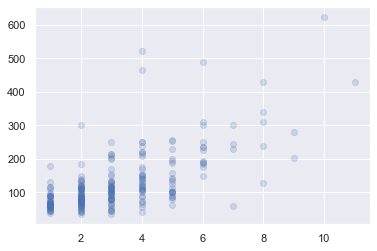

In [188]:
plt.scatter(data['Nb Beds'], data['Night Price'], alpha=0.2)

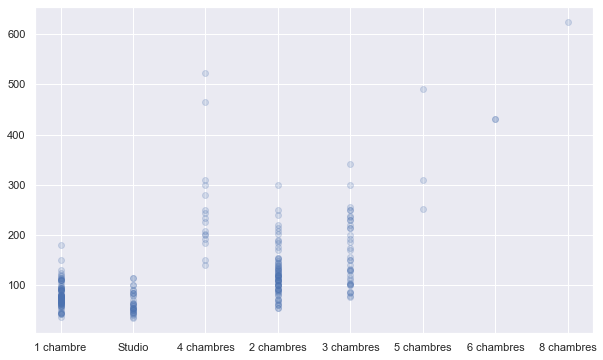

In [187]:
data1 = data[['Housing Type', 'Night Price']].dropna(axis=0)
plt.figure(figsize=(10,6))
plt.scatter(data1['Housing Type'], data1['Night Price'], alpha=0.2)


## Data Science with the data

In [196]:
import numpy as np
from sklearn.linear_model import LinearRegression
data

,Night Price,Nb Travellers,Housing Type,Nb Beds,Nb Bathroom,SuperHost,Rating,Nb Comments
0,58,4,1 chambre,2,1,False,4.97,61
1,46,3,Studio,2,1,False,4.94,34
2,279,10,4 chambres,9,3,True,None,0
3,85,4,Studio,2,1,True,4.96,179
4,None,4,2 chambres,5,1,True,4.64,78
...,...,...,...,...,...,...,...,...
251,225,8,4 chambres,6,2,False,None,0
252,523,8,4 chambres,4,2,False,None,0
253,88,4,1 chambre,1,1,False,4.63,8
254,300,4,2 chambres,2,2,False,4.75,4


In [191]:
housing = data.copy()
housing = housing.replace({None: np.nan})
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 255
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Night Price    244 non-null    float64
 1   Nb Travellers  244 non-null    float64
 2   Housing Type   244 non-null    object 
 3   Nb Beds        244 non-null    float64
 4   Nb Bathroom    244 non-null    float64
 5   SuperHost      244 non-null    bool   
 6   Rating         244 non-null    object 
 7   Nb Comments    244 non-null    int64  
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 15.5+ KB


In [199]:
x = housing[['Nb Travellers', 'Nb Beds', 'Nb Bathroom']]

y = housing[['Night Price']]
y = y.reshape(-1, 1)
x

,Nb Travellers,Nb Beds,Nb Bathroom
0,4.0,2.0,1.0
1,3.0,2.0,1.0
2,10.0,9.0,3.0
3,4.0,2.0,1.0
5,8.0,4.0,1.0
...,...,...,...
251,8.0,6.0,2.0
252,8.0,4.0,2.0
253,4.0,1.0,1.0
254,4.0,2.0,2.0


In [201]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [203]:
reg.score(x,y)

0.6465123595724556

In [206]:
from sklearn.feature_selection import f_regression
f_regression(x,y)

C:\Users\eric1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([356.98731115, 186.99335682, 202.01331614]),
 array([1.56637132e-49, 6.34983769e-32, 9.66559799e-34]))

In [210]:
reg.predict([[8, 4, 2]])

C:\Users\eric1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[239.73318461]])

In [211]:
reg.predict([[8, 5, 2]])

C:\Users\eric1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[236.69101038]])

## Notes But + Idées

### But

Récupérer toutes les données des airbnb existant à partir d'une recherche  
Itérer à travers les pages pour récupérers les liens vers toutes les annonces  
Pour chaque annonce, récupérer le prix/nuit, catégorie, nb voyageurs, nb lit, nb sdb, note, superhote, distance mer  

### Idée

Print l'avancement du scraping avec le nombre de pages d'annonce récup / numPageMax  
puis avec le nombre d'annonce scrapé avec nbPageScrape/len(str_links)  
Faire une autre IA qui pourrait calculer la distance mer/point sur la map

### Améliorations
 
Mettre le code qui scrape dans une fonction qui retourne la list ou une erreur.  
Si erreur, retester une fois avec cette page pour éviter un bug de chargement de la page,
Sinon, sauter cette annonce en retenant son numéro.  
A la fin retourner une liste des annonces où un bug a eu lieu.  

Pour la regression linéaire, toutes les var de Housing Type/ Nb bed/ Nb traveller sont corrélés. Il ne faut en prendre qu'une ou alors la réduire a une seule et unique variable.  
Il faudrait d'autres éléments comme proximité avec la place/ vue sur la plage, Wifi, Télé, Place de parking réservé  
On peut les récup dans les équipement disponible (penser à ne pas récup ceux qui sont barré : area-hidden=True)
Sea View : 'Vue sur l'océan', 'Vue sur la baie'
Sea Access : 'Accès plage ou bord de mer', 
Wifi : 'Wifi'
TV : 'Télévision', 'TV avec abonnement standard au câble'
Garden : 'Arrière-cour', 'Arrière-cour privée – Clôture intégrale'